根据五个输入单元及两个初始值，构建kalman函数，对Kalman滤波算法进行实现

In [1]:
def kalman(Z,A=None,H=None,Q=None,R=None,X0=None,P0=None):
    """
    该函数对Kalman滤波算法进行实现
    Z:观测量
    A:状态转移矩阵，默认初始化为diag(ncol(Z))
    H:观测协方差矩阵，默认初始化为diag(ncol(Z))
    Q:系统噪声协方差矩阵，默认初始化为diag(ncol(Z))
    R:观测噪声协方差矩阵，默认初始化为diag(ncol(Z))
    X0:状态量初始值，默认初始化为diag(ncol(Z))
    P0:误差协方差矩阵，默认初始化为diag(ncol(Z))
    """
    dmt = np.identity(Z.shape[1])
    A,H,Q,R,X0,P0 = [e if e is not None else dmt for e in [A,H,Q,R,X0,P0]]
    X = [X0]
    P = [P0]
    N = Z.shape[0]
    I = np.identity(A.shape[0])
    for i in range(N):
        # 均方误差的一步预测方程
        Pp = np.matmul(np.matmul(A,P[i]),A.T)+Q
        # 滤波增益方程（权重）
        K = np.matmul(np.matmul(Pp,H.T),np.linalg.inv(np.matmul(np.matmul(H,Pp),H.T)+R))
        # 状态的一步预测方程
        Xp = np.matmul(A,X[i])
        # 滤波估计方程（k时刻的最优值）
        X.append(Xp+np.matmul(K,np.identity(Z.shape[1])*Z[i,:]-np.matmul(H,Xp)))
        # 均方误差更新矩阵（k时刻的最优均方误差）
        P.append(np.matmul(I - np.matmul(K,H),Pp))
    return X

进一步，调用kalman函数，对canada的全部数据逐期进行Kalman滤波，并生成每期的拟合值序列，最后将拟合值序列与真实值序列进行对比，以分析预测效果

In [2]:
import pandas as pd
import numpy as np
src_canada = pd.read_csv("http://image.cador.cn/data/canada.csv")
val_columns = ['e','prod','rw','U']
Z = src_canada[val_columns].values
X = kalman(Z)
out = []
[out.append(np.diag(e)) for e in X[1::]]
out = np.array(out)

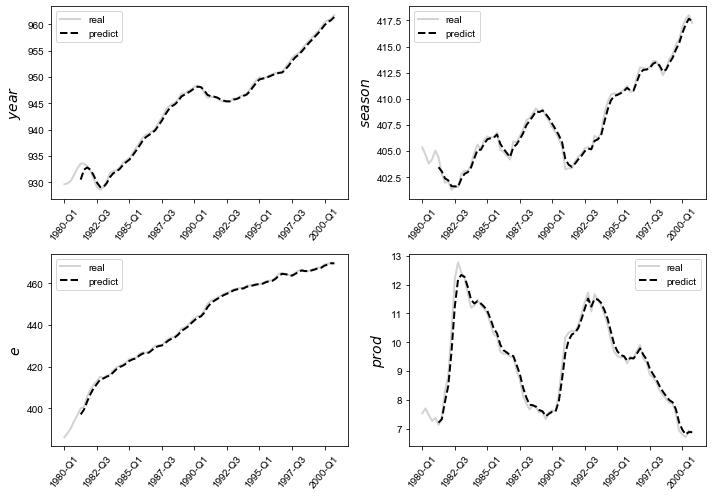

In [3]:
import matplotlib.pyplot as plt
import matplotlib
# 以下 font.family 设置仅适用于 Mac系统，其它系统请使用对应字体名称
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
xts = src_canada[['year','season']].apply(lambda x:str(x[0])+'-'+x[1],axis=1).values
fig, axes = plt.subplots(2,2,figsize=(10,7))
index = 0
for ax in axes.flatten():
    ax.plot(range(out.shape[0]),src_canada[val_columns[index]],'-',c='lightgray',linewidth=2,label="real")
    ax.set_xticks(range(out.shape[0])[::10])
    ax.set_xticklabels(xts[::10],rotation=50)
    ax.plot(range(5,out.shape[0]),out[5:,index],'--',c='black',linewidth=2,label="predict")
    ax.set_ylabel("$"+src_canada.columns[index]+"$",fontsize=14)
    ax.legend()
    index = index + 1
plt.tight_layout()
plt.show()